In [33]:
import pandas as pd
import numpy as np
import os
from random import randint
import matplotlib.pyplot as plt

# 1 Pré-traitement des données

## 1.0 Compréhension du sujet

Score :
* 1 ou a ou A vaut 1 point
* 2 ou b ou B vaut 0 point
* 3 ou c ou C vaut 2 points

Interpretation :
* score < 10 => C
* score < 20 => B
* score < 30 => A


## 1.1 - Importation du fichier CSV

In [34]:
# Importation du jeu de données.
data = pd.read_csv('combined_csv.csv')
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
230,c,c,NaN,c,c,NaN,NaN,3.0,3,3,14,B
231,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
232,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
233,a,n,e,a,b,v,t,Y,',1,3,C


## 1.2 Description et information du fichier CSV

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              227 non-null    object
 1   Q2              223 non-null    object
 2   Q3              222 non-null    object
 3   Q4              225 non-null    object
 4   Q5              221 non-null    object
 5   Q6              223 non-null    object
 6   Q7              225 non-null    object
 7   Q8              222 non-null    object
 8   Q9              225 non-null    object
 9   Q10             227 non-null    object
 10  Score           235 non-null    int64 
 11  Interpretation  235 non-null    object
dtypes: int64(1), object(11)
memory usage: 22.2+ KB


In [36]:
print(data.shape, data.columns)

(235, 12) Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Score',
       'Interpretation'],
      dtype='object')


In [37]:
data.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
5,c,b,a,c,b,2,3,1,3,2,10,B
6,g,z,ju,d,u,4,7,2,3,1,3,C
7,j,f,d,t,u,2,6,3,1,3,5,C
8,a,d,c,b,a,2,3,7,1,3,9,C
9,a,b,c,e,d,2,3,2,1,3,8,C


In [38]:
print(data.columns.tolist()[:10])
print(data.columns[:10])

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']
Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')


# 1.3 Traitement des données

In [39]:
# On récupère juste les questions car nous allons recalculer les scores et les interprétations après.
data = data.iloc[:, :10]

val_rand = ['1', '2', '3']
for headers in list(data):
    for i in range(0, len(data[headers])):
        # On transforme les a, b, c en 1, 2, 3.
        if data[headers][i] == 'a' or data[headers][i] == 'A':
            data[headers][i] = '1'
        elif data[headers][i] == 'b' or data[headers][i] == 'B':
            data[headers][i] = '2'
        elif data[headers][i] == 'c' or data[headers][i] == 'C':
            data[headers][i] = '3'
        
        # On enlève les nan.
        # On transforme les erreurs de saisie et les nan en 2 (0 point) ou 1, 2 ou 3 (nombre de points aléatoires).
        # Commentez la méthode que vous ne voulez pas.
        elif data[headers][i] not in ['1', '2', '3']:
        
            # Méthode 1: 0 points
            #data[headers][i] = '2'
            
            # Méthode 2: Nombre de points aléatoires
            data[headers][i] = val_rand[randint(0,2)]


print(data.head(10))

  Q1 Q2 Q3 Q4 Q5 Q6 Q7 Q8 Q9 Q10
0  1  1  1  1  1  1  1  1  1   1
1  2  2  2  2  2  2  2  2  2   2
2  3  3  3  3  3  3  3  3  3   3
3  1  2  3  1  2  1  2  3  1   2
4  2  3  1  3  1  3  2  3  1   2
5  3  2  1  3  2  2  3  1  3   2
6  2  3  2  2  3  3  1  2  3   1
7  2  2  3  1  2  2  2  3  1   3
8  1  1  3  2  1  2  3  3  1   3
9  1  2  3  3  2  2  3  2  1   3


In [40]:
# On change les types de données.
for headers in list(data):
    data[headers] = data[headers].astype(str).astype(int)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      235 non-null    int32
 1   Q2      235 non-null    int32
 2   Q3      235 non-null    int32
 3   Q4      235 non-null    int32
 4   Q5      235 non-null    int32
 5   Q6      235 non-null    int32
 6   Q7      235 non-null    int32
 7   Q8      235 non-null    int32
 8   Q9      235 non-null    int32
 9   Q10     235 non-null    int32
dtypes: int32(10)
memory usage: 9.3 KB
None


In [41]:
# On calcule le nouveau score.
score_val = {1: 1, 2: 0, 3: 2}

scores = []
for i in range(0, len(data['Q1'])):
    somme = 0
    for elt in list(data.iloc[i, :10]):
        somme += score_val[elt]
    
    scores.append(somme)
#     scores.append(sum([score_val[elt] for elt in list(data.iloc[i, :10])]))

data['Score'] = scores
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q1      235 non-null    int32
 1   Q2      235 non-null    int32
 2   Q3      235 non-null    int32
 3   Q4      235 non-null    int32
 4   Q5      235 non-null    int32
 5   Q6      235 non-null    int32
 6   Q7      235 non-null    int32
 7   Q8      235 non-null    int32
 8   Q9      235 non-null    int32
 9   Q10     235 non-null    int32
 10  Score   235 non-null    int64
dtypes: int32(10), int64(1)
memory usage: 11.1 KB
None
   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Score
0   1   1   1   1   1   1   1   1   1    1     10
1   2   2   2   2   2   2   2   2   2    2      0
2   3   3   3   3   3   3   3   3   3    3     20
3   1   2   3   1   2   1   2   3   1    2      8
4   2   3   1   3   1   3   2   3   1    2     11
5   3   2   1   3   2   2   3   1   3    2     10
6   2   3   2   2   3   3   1   2  

In [42]:
# score < 10 => C
# score < 20 => B
# score < 30 => A
interpretations = []
for i in data["Score"]:    
    if i < 10:
        interpretation = 'C'
    elif i < 20:
        interpretation = 'B'
    elif i < 30:
        interpretation = 'A'
        
    interpretations.append(interpretation)
data["Interpretation"] = interpretations
data.head(10)
        

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1,1,1,1,1,1,1,1,1,1,10,B
1,2,2,2,2,2,2,2,2,2,2,0,C
2,3,3,3,3,3,3,3,3,3,3,20,A
3,1,2,3,1,2,1,2,3,1,2,8,C
4,2,3,1,3,1,3,2,3,1,2,11,B
5,3,2,1,3,2,2,3,1,3,2,10,B
6,2,3,2,2,3,3,1,2,3,1,10,B
7,2,2,3,1,2,2,2,3,1,3,8,C
8,1,1,3,2,1,2,3,3,1,3,12,B
9,1,2,3,3,2,2,3,2,1,3,10,B


In [43]:
# On ajoute la nouvelle interprétation.

# Méthode 1.
# interpretation = []
# for i in range(0, len(data["Score"])):
#    if data["Score"][i] < 10:
#        interpretation.append('C')
#    elif data["Score"][i] < 20:
#        interpretation.append('B')
#    elif data["Score"][i] < 30:
#        interpretation.append('A')
# data['Interpretation'] = interpretation

# Méthode 2.
#interpretation = []
#for i in data["Score"]:
#     print(ord('C'), '-' ,i // 10, '=', ord('C') - i // 10, 'ou', chr(ord('C') - i // 10))
 #   interpretation.append(chr(ord('C') - i // 10))
#data['Interpretation'] = interpretation


# Méthode 3.
# data['Interpretation'] = [chr(ord('C') - (s // 10)) for s in data["Score"]]


#print(data.head(10))

# 2 Développement et entraînement d'un modèle KNN from Scratch

1) Avoir une fonction capable de calculer la distance  

2) Classer ces distances par ordre croissant et récupérer les X plus proches voisins

3) Trouver quel label est le plus commun parmis les voisins du point cible



In [45]:
# Séparer features et target

X = data.drop(['Interpretation', 'Score'], axis=1)
y = data['Interpretation']

#### Séparation du jeu de train et de test

In [46]:
Pourcentage_Train = 0.8

Nbr_ligne_tr = int(len(X)*Pourcentage_Train)
X_train = X.iloc[0:Nbr_ligne_tr,:]
y_train = y[0:Nbr_ligne_tr]

X_test = X.iloc[Nbr_ligne_tr+1:,:]
y_test = y[Nbr_ligne_tr+1:]

In [47]:
y_train

0      B
1      C
2      A
3      C
4      B
      ..
183    B
184    B
185    B
186    C
187    B
Name: Interpretation, Length: 188, dtype: object

In [48]:
X_test

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
189,1,1,1,2,2,1,2,2,2,2
190,2,2,2,2,2,1,1,1,1,1
191,3,3,3,3,1,1,1,2,1,1
192,3,3,3,3,3,1,3,3,1,1
193,1,2,2,1,1,1,1,1,1,1
194,2,2,2,2,1,1,1,2,2,2
195,1,1,1,1,1,1,2,1,1,1
196,1,2,3,1,2,2,2,1,2,3
197,3,3,3,1,1,3,2,2,1,3
198,3,2,2,2,2,2,3,2,2,2


In [49]:

def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    if kargs.items():
        
        for key,value in kargs.items():
            if key == 'p' :
                p = value
    else :
        p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis
########################################################################
########################################################################
k = 3
metric = 'minkowski'

def knn(X_test, X_train, y_train, k, metric) :
    

    Resultat = []
    for j in range(0,len(X_test)):
    
        D_T = X_test.iloc[j,:]

        Distance = []
        for i in range(0,len(X_train)):
            D_A = X_train.iloc[i,:]
        
            #Dis = np.sqrt(np.sum((D_T-D_A)**2))
        
            Dis = distance(D_T, D_A, metric=metric)
            Distance.append(Dis)

        SS = np.sort(Distance)  
        S = np.argsort(Distance)

        index_petite_distance = S[:k]
        Pred = y_train.iloc[index_petite_distance]

        Pred = [np.sum((Pred == 'A').astype(int)), np.sum((Pred == 'B').astype(int)), np.sum((Pred == 'C').astype(int))]

        Pred = np.argmax(Pred)

        if Pred == 0:
            P = 'A'
        elif Pred == 1 :
            P = 'B' 
        else : P = 'C'
        
        Resultat.append(P)
        
    return Resultat


y_pred = knn(X_test, X_train, y_train, k, metric) 

In [50]:
y_pred

['C',
 'C',
 'C',
 'B',
 'B',
 'C',
 'B',
 'C',
 'B',
 'C',
 'C',
 'B',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C',
 'B',
 'C',
 'C',
 'C',
 'B',
 'C',
 'C',
 'C',
 'B',
 'C',
 'C',
 'C',
 'C',
 'B',
 'B',
 'B',
 'B',
 'C',
 'B',
 'C',
 'B',
 'B',
 'C']

In [51]:
# Calculer la précision de notre modèle
# Rappel de la formule pour la précision :
# Precision = (TP+TN)/ (TP+FN+TN+FP)

# Créer la matrice de confusion
def confusion_matrix (expected, practical):
    # Récupérer la liste des labels possibles
    # = avoir la liste des labels uniques
    classes = set(expected)
    # Le nombre de classes (= nombre de colonnes de la matrice)
    number_of_classes = len(classes)

    # Création d'un dataframe, de taille (nombre de classes x nombre de classes)
    # Le tout initialisé à 0 avec np.zeros
    # Le dataframe à pour indice et colonnes les noms de nos labels
    conf_matrix = pd.DataFrame(
        np.zeros((number_of_classes, number_of_classes),dtype=int),
        index=classes,
        columns=classes)
    
    # Pour chaque valeur (théorique et son équivalent pratique)
    for true_value, practical_value in zip(expected, practical):
        # On ajoute 1 à son emplacement dans la matrice
        # Par exemple si on devait obtenir le label 1 et qu'en pratique
        # on a trouvé 1
        # on incrémente la valeur contenue dans la matrice à l'emplacement (1, 1)
        #     1    2    3
        # 1   1    0    0
        # 2   0    0    0
        # 3   0    0    0
        #
        # Si maintenant on devait détecter 3 mais qu'en pratique on a trouvé 2
        # on incrémente la valeur contenue dans la matrice à l'emplacement (3, 2)
        #     1    2    3
        # 1   1    0    0
        # 2   0    0    0
        # 3   0    1    0
        conf_matrix.loc[true_value, practical_value] += 1

    return conf_matrix.transpose().values

def accuracy (expected_results, practical_results):
    # Récupérer la matrice de confusion
    matrix = confusion_matrix(expected_results, practical_results)
    matrix = np.flip(matrix)
    
    # Calculer le score, donc la liste des True Positives (dans la diagonale) / la somme totale
    score = sum([matrix[x][x] for x in range(len(set(practical_results)))]) / np.sum(matrix)
    
    return score


print(accuracy(y_test.to_numpy(), y_pred))

0.32608695652173914


############################################################################################

In [53]:
#methode 2 
#from math import sqrt
#from scipy.spatial import distance as distance_scipy

# voir: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

#def distance(tab1, tab2, metrics='Euclidean'):
 #   return distance_scipy.cdist(tab1, tab2, metrics)


Text(0, 0.5, 'Précision (%)')

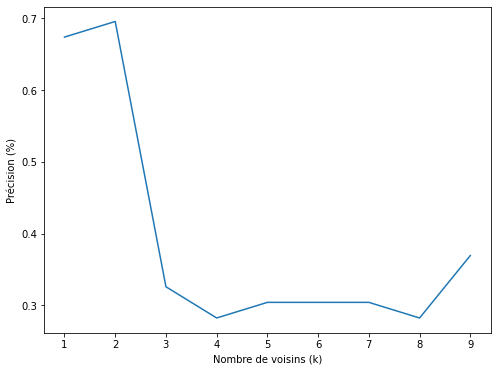

In [54]:
# Calculer la précision avec la variation du nombre de voisins choisis
accuracies = []

# Pour k allant de 1 à 10 voisins
for k in range(1,10):
    # Calculer les prédictions
    y_pred = knn(X_test, X_train, y_train, k, metric)
    # Caluler la précision des prédictions
    accuracies.append(accuracy(y_test, y_pred))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,10), accuracies)
ax.set_xlabel('Nombre de voisins (k)')
ax.set_ylabel('Précision (%)')

# 3 KNN Sklearn

In [55]:
#X = data.drop(columns=['Score','Interpretation'], axis=1) ou bien
X = data.loc[:, data.columns != 'Interpretation']
y = data['Interpretation']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [59]:
y_pred = classifier.predict(X_test)
y_pred

array(['B', 'B', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'C', 'B',
       'B', 'B', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'C', 'C', 'C', 'B',
       'B', 'C', 'C', 'C', 'B', 'C', 'C', 'B', 'B', 'B', 'C', 'B', 'B',
       'C', 'B', 'C', 'B', 'B', 'C', 'B', 'B'], dtype=object)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Précision du modèle : ', accuracy_score(y_test, y_pred))
print('\nMatrice de confusion : \n', confusion_matrix(y_test, y_pred))
print('\nReport : \n', classification_report(y_test, y_pred))

Précision du modèle :  0.7021276595744681

Matrice de confusion : 
 [[ 0  1  0]
 [ 0 21  6]
 [ 0  7 12]]

Report : 
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.72      0.78      0.75        27
           C       0.67      0.63      0.65        19

    accuracy                           0.70        47
   macro avg       0.46      0.47      0.47        47
weighted avg       0.69      0.70      0.69        47



C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn import neighbors, metrics
from sklearn import model_selection

# Fixer les valeurs des hyperparamètres à tester?? c est k
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15],
             'metric' : ['euclidean', 'minkowski']}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'metric': 'euclidean', 'n_neighbors': 11}
Résultats de la validation croisée :
accuracy = 0.771 (+/-0.112) for {'metric': 'euclidean', 'n_neighbors': 3}
accuracy = 0.761 (+/-0.090) for {'metric': 'euclidean', 'n_neighbors': 5}
accuracy = 0.777 (+/-0.062) for {'metric': 'euclidean', 'n_neighbors': 7}
accuracy = 0.793 (+/-0.128) for {'metric': 'euclidean', 'n_neighbors': 9}
accuracy = 0.799 (+/-0.124) for {'metric': 'euclidean', 'n_neighbors': 11}
accuracy = 0.793 (+/-0.090) for {'metric': 'euclidean', 'n_neighbors': 13}
accuracy = 0.788 (+/-0.112) for {'metric': 'euclidean', 'n_neighbors': 15}
accuracy = 0.771 (+/-0.112) for {'metric': 'minkowski', 'n_neighbors': 3}
accuracy = 0.761 (+/-0.090) for {'metric': 'minkowski', 'n_neighbors': 5}
accuracy = 0.777 (+/-0.062) for {'metric': 'minkowski', 'n_neighbors': 7}
accuracy = 0.793 (+/-0.128) for {'metric': 'minkowski', 'n_neighbors': 9}
accuracy = 0.799 (+/-0.124) for {'metric': 'mi

In [62]:
import joblib

filename = 'KNN_brief'

joblib.dump(classifier, filename)

nom_du_modele = joblib.load(filename)